# Job Placement Classification

In [ ]:
import numpy as np   
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier  

In [4]:
df=pd.read_csv("C:/Users/rfpaw/Downloads/Job_Placement_Data.csv")

In [5]:
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [6]:
df.isnull().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [7]:
df.shape            # Shape of Dataset i.e Number of Rows and Columns Present in Dataset

(215, 13)

In [8]:
df.columns

Index(['gender', 'ssc_percentage', 'ssc_board', 'hsc_percentage', 'hsc_board',
       'hsc_subject', 'degree_percentage', 'undergrad_degree',
       'work_experience', 'emp_test_percentage', 'specialisation',
       'mba_percent', 'status'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [10]:
df.dtypes

gender                  object
ssc_percentage         float64
ssc_board               object
hsc_percentage         float64
hsc_board               object
hsc_subject             object
degree_percentage      float64
undergrad_degree        object
work_experience         object
emp_test_percentage    float64
specialisation          object
mba_percent            float64
status                  object
dtype: object

In [11]:
df.size

2795

In [12]:
df.isnull().sum()       # Checking Null Values present in dataset

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [13]:
df.dtypes

gender                  object
ssc_percentage         float64
ssc_board               object
hsc_percentage         float64
hsc_board               object
hsc_subject             object
degree_percentage      float64
undergrad_degree        object
work_experience         object
emp_test_percentage    float64
specialisation          object
mba_percent            float64
status                  object
dtype: object

### Performing LabelEncoding On DataSet

In [14]:
le=LabelEncoder()    # To convert categorical data into numerical data for model building

In [15]:
df["gender"]=le.fit_transform(df["gender"])
df["ssc_board"]=le.fit_transform(df["ssc_board"])
df["hsc_board"]=le.fit_transform(df["hsc_board"])
df["hsc_subject"]=le.fit_transform(df["hsc_subject"])
df["undergrad_degree"]=le.fit_transform(df["undergrad_degree"])
df["work_experience"]=le.fit_transform(df["work_experience"])
df["specialisation"]=le.fit_transform(df["specialisation"])
df["status"]=le.fit_transform(df["status"])


In [16]:
df.dtypes

gender                   int32
ssc_percentage         float64
ssc_board                int32
hsc_percentage         float64
hsc_board                int32
hsc_subject              int32
degree_percentage      float64
undergrad_degree         int32
work_experience          int32
emp_test_percentage    float64
specialisation           int32
mba_percent            float64
status                   int32
dtype: object

In [17]:
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1


In [18]:
df.describe().T       # Statistical Summary Of Dataset

,count,mean,std,min,25%,50%,75%,max
gender,215.0,0.646512,0.479168,0.00,0.000,1.0,1.000,1.00
ssc_percentage,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
ssc_board,215.0,0.460465,0.499598,0.00,0.000,0.0,1.000,1.00
hsc_percentage,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
hsc_board,215.0,0.609302,0.489045,0.00,0.000,1.0,1.000,1.00
hsc_subject,215.0,1.372093,0.580978,0.00,1.000,1.0,2.000,2.00
degree_percentage,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
undergrad_degree,215.0,0.600000,0.890238,0.00,0.000,0.0,2.000,2.00
work_experience,215.0,0.344186,0.476211,0.00,0.000,0.0,1.000,1.00
emp_test_percentage,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00


### Changing DataTypes of Data in Dataset

In [19]:
df.dtypes 

gender                   int32
ssc_percentage         float64
ssc_board                int32
hsc_percentage         float64
hsc_board                int32
hsc_subject              int32
degree_percentage      float64
undergrad_degree         int32
work_experience          int32
emp_test_percentage    float64
specialisation           int32
mba_percent            float64
status                   int32
dtype: object

In [20]:
df["ssc_percentage"]=df["ssc_percentage"].astype("int")
df["hsc_percentage"]=df["hsc_percentage"].astype("int")
df["degree_percentage"]=df["degree_percentage"].astype("int")
df["emp_test_percentage"]=df["emp_test_percentage"].astype("int")
df["mba_percent"]=df["mba_percent"].astype("int")
 # changing float into int

In [21]:
df.dtypes

gender                 int32
ssc_percentage         int32
ssc_board              int32
hsc_percentage         int32
hsc_board              int32
hsc_subject            int32
degree_percentage      int32
undergrad_degree       int32
work_experience        int32
emp_test_percentage    int32
specialisation         int32
mba_percent            int32
status                 int32
dtype: object

### Removing Outliers present in Dataset

<Axes: >

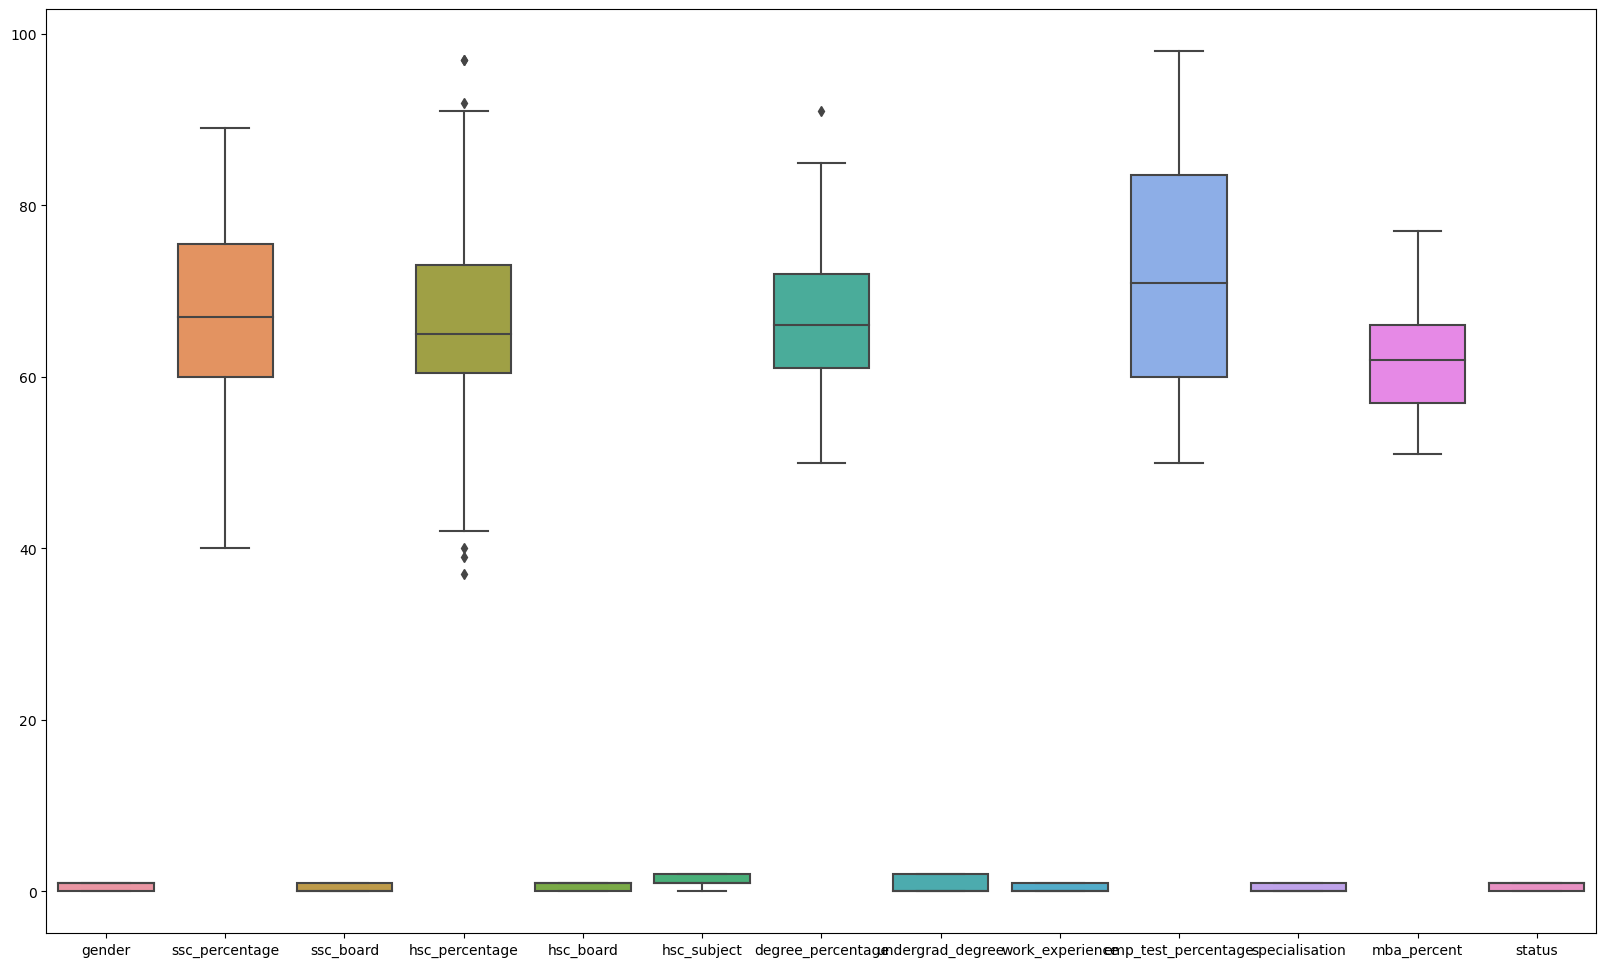

In [22]:
plt.figure(figsize=(20,12))        # Ploting Boxplot to detect outliers
sns.boxplot(data=df)

### Steps to Remove Outliers


In [84]:
Q1=df.quantile(q=0.25)         # finding Q1 value
Q3=df.quantile(q=0.75)         # Finding Q3 value
IQR=Q3-Q1                       # Finding IQR Value i.e(InterQuantileRange)
upper=Q3+(1.5*IQR)              # to detect upper outliers
lower=Q1-(1.5*IQR)              # to detect lower outliers

In [85]:
df1=df[~((df>upper)|(df<lower))]   #(~)this is use for as we want both < ,> valuesleaving them want remaining values
#if we dont use ~ here then it will take outlier values

<Axes: >

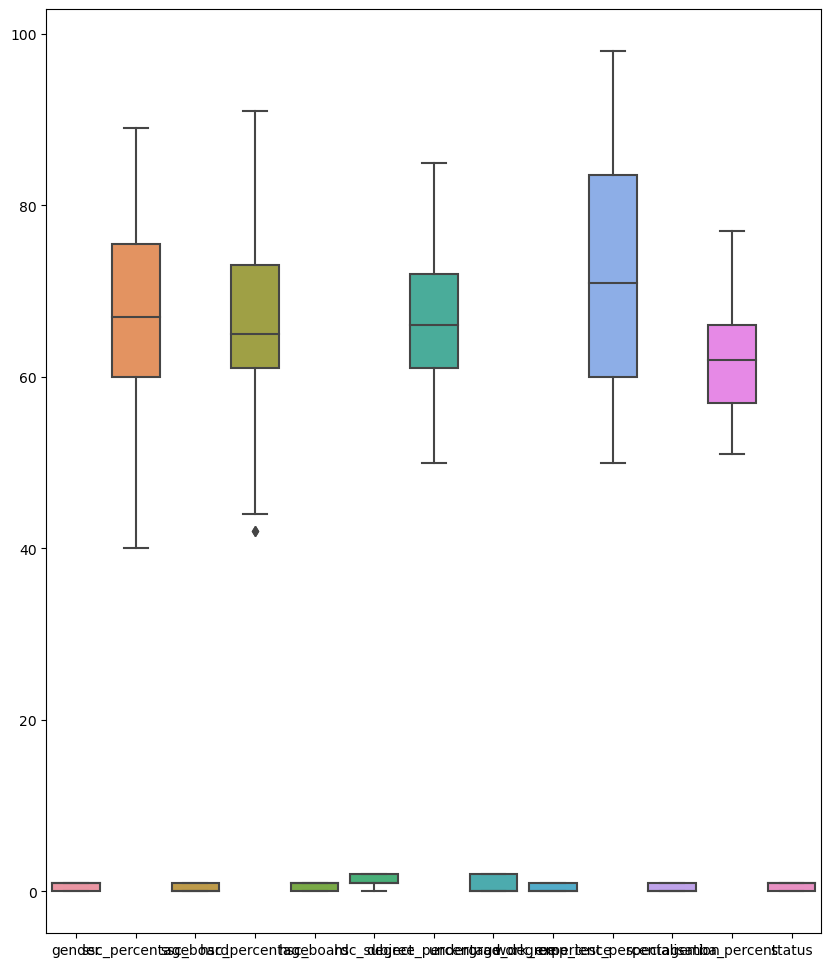

In [86]:
plt.figure(figsize=(10,12))         # Boxplot after removing Outliers
sns.boxplot(df1)              

In [87]:
df1.isnull().sum()       # After removing outlier we get some nan values 

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         6
hsc_board              0
hsc_subject            0
degree_percentage      1
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [88]:
df2=df1.dropna()     # removing that nan values

### HeatMap To Show Corelation between Data


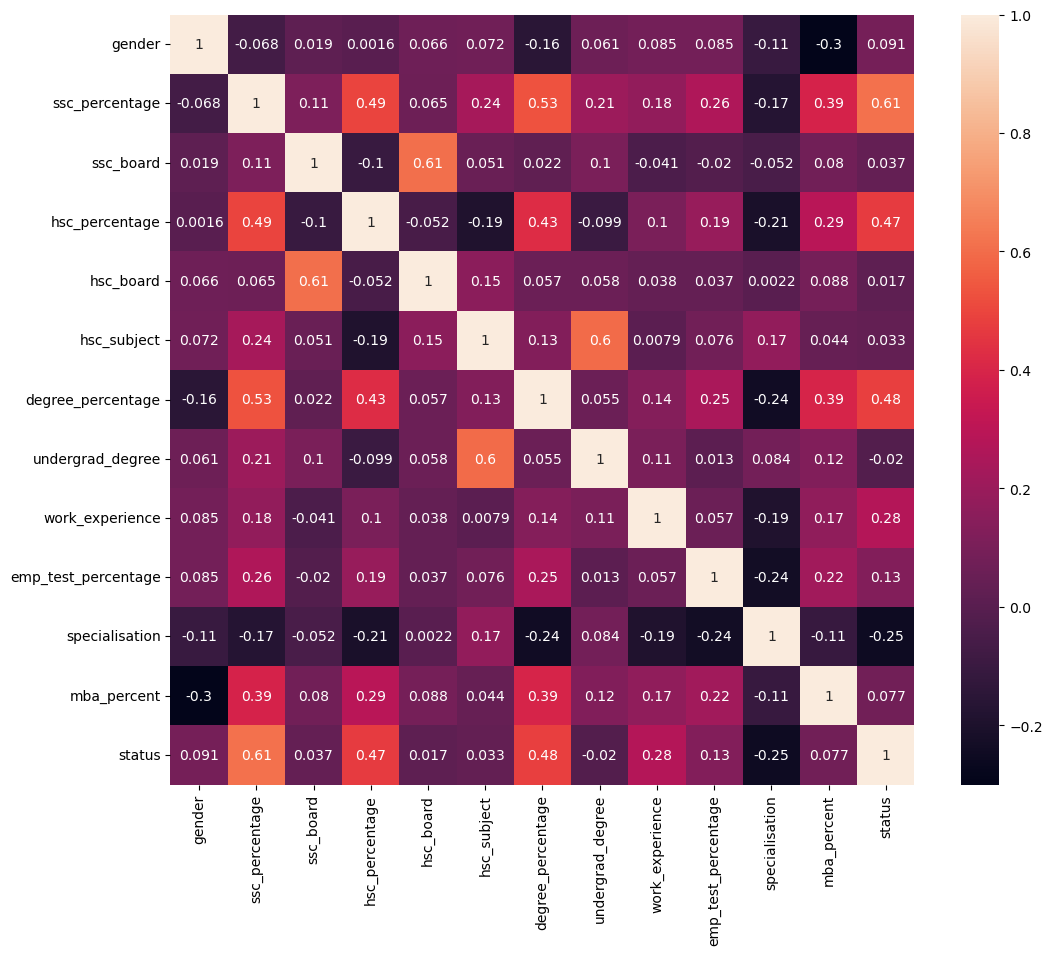

In [89]:
plt.figure(figsize=(12,10))
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [90]:
print(df1["status"].unique())
print(df1["status"].value_counts(normalize=True)*100)

[1 0]
status
1    68.837209
0    31.162791
Name: proportion, dtype: float64


([<matplotlib.patches.Wedge at 0x2235167fc50>,
 [Text(-0.624871104046147, 0.9052823334894753, 'YES'),
  Text(0.6248709345288374, -0.9052824504987698, 'NO')])

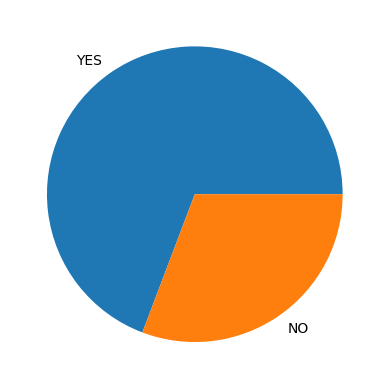

In [91]:
plt.pie(df2["status"].value_counts(normalize=True)*100,labels=["YES","NO"])

## Model Building for DataSet

In [92]:
x=df2.drop(["status"],axis=1)
y=df2["status"]

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)    # splliting data into x and y

In [94]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(145, 12)
(63, 12)
(145,)
(63,)


### LOGISTIC REGRESSION ALGORITHM

In [95]:
le=LogisticRegression()  
le.fit(x_train,y_train)

C:\Users\rfpaw\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [96]:
y_true,y_pred=y_test,le.predict(x_test)
print(le.score(x_train,y_train)*100)
print(le.score(x_test,y_test)*100)

88.96551724137932
85.71428571428571


In [97]:
print(precision_score(y_true,y_pred)*100)
print(recall_score(y_true,y_pred)*100)
print(accuracy_score(y_true,y_pred)*100)

86.66666666666667
92.85714285714286
85.71428571428571


## RANDOM FOREST CLASSIFIER ALGORITHM

In [98]:
rf=RandomForestClassifier(n_estimators=6,random_state=1)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=6, random_state=1)

In [99]:
y_true,y_pred=y_test,rf.predict(x_test)
print(rf.score(x_train,y_train)*100)
print(rf.score(x_test,y_test)*100)

95.17241379310344
84.12698412698413


In [100]:
print(precision_score(y_true,y_pred)*100)
print(recall_score(y_true,y_pred)*100)
print(accuracy_score(y_true,y_pred)*100)

84.78260869565217
92.85714285714286
84.12698412698413


## DECISION TREE CLASSIFIER ALGORITHM

In [101]:
dt=DecisionTreeClassifier(criterion="gini",max_depth=4,random_state=1)    #multiclass classification (yes/no)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [102]:
y_true,y_pred=y_test,dt.predict(x_test)
print(dt.score(x_train,y_train)*100)
print(dt.score(x_test,y_test)*100)

91.0344827586207
77.77777777777779


In [103]:
print(precision_score(y_true,y_pred)*100)
print(recall_score(y_true,y_pred)*100)
print(accuracy_score(y_true,y_pred)*100)

76.92307692307693
95.23809523809523
77.77777777777779


### GRADIENT BOOSTING CLASSIFIER ALGORITHM

In [104]:
gb=GradientBoostingClassifier(n_estimators=20)    #gradient boosting : take derivative of error to reduce error
gb.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=20)

In [105]:
y_true,y_pred=y_test,gb.predict(x_test)
print(gb.score(x_train,y_train)*100)
print(gb.score(x_test,y_test)*100)

93.79310344827586
77.77777777777779


In [106]:
print(precision_score(y_true,y_pred)*100)
print(recall_score(y_true,y_pred)*100)
print(accuracy_score(y_true,y_pred)*100)

76.92307692307693
95.23809523809523
77.77777777777779


### BAGGING CLASSIFIER ALGORITHM

In [107]:
bg=BaggingClassifier(n_estimators=20)
bg.fit(x_train,y_train)

BaggingClassifier(n_estimators=20)

In [108]:
y_true,y_pred=y_test,bg.predict(x_test)
print(bg.score(x_train,y_train)*100)
print(bg.score(x_test,y_test)*100)

100.0
77.77777777777779


In [109]:
print(precision_score(y_true,y_pred)*100)
print(recall_score(y_true,y_pred)*100)
print(accuracy_score(y_true,y_pred)*100)

80.43478260869566
88.09523809523809
77.77777777777779


### ADABOOST CLASSIFIER ALGORITHM

In [110]:
ad=AdaBoostClassifier(n_estimators=20,estimator=dt,random_state=1)
ad.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4,
                                                    random_state=1),
                   n_estimators=20, random_state=1)

In [111]:
y_true,y_pred=y_test,ad.predict(x_test)
print(ad.score(x_train,y_train)*100)
print(ad.score(x_test,y_test)*100)

100.0
84.12698412698413


In [112]:
y_true,y_pred=y_test,ad.predict(x_test)
print(dt.score(x_train,y_train)*100)
print(dt.score(x_test,y_test)*100)

91.0344827586207
77.77777777777779


### KNeighbors CLASSIFIER ALGORITHM

In [113]:
kn=KNeighborsClassifier(weights="distance")   #grouping same type of data (features) 
kn.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

In [114]:
y_true,y_pred=y_test,kn.predict(x_test)
print(kn.score(x_train,y_train)*100)
print(kn.score(x_test,y_test)*100)

100.0
85.71428571428571


In [115]:
print(precision_score(y_true,y_pred)*100)
print(recall_score(y_true,y_pred)*100)
print(accuracy_score(y_true,y_pred)*100)

82.35294117647058
100.0
85.71428571428571


### SVC (SUPPORT VECTOR CLASSIFIER) ALGORITHM

In [116]:
svc=SVC(C=1.0,kernel="linear")  #from support vector machine i have imported support vector classifier
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [117]:
y_true,y_pred=y_test,svc.predict(x_test)
print(svc.score(x_train,y_train)*100)
print(svc.score(x_test,y_test)*100)

89.65517241379311
90.47619047619048


In [118]:
print(precision_score(y_true,y_pred)*100)
print(recall_score(y_true,y_pred)*100)
print(accuracy_score(y_true,y_pred)*100)

92.85714285714286
92.85714285714286
90.47619047619048


### CONCLUSION HERE, THE SUPPORT VECTOR CLASSIFIER IS BEST FIT MODEL FOR JOB PLACEMENT CLASSIFICATION DATASET BECAUSE THE DIFFERENCE BETWEEN TRAINING SCORE SND TESTING SCORE IS LOW AND ACCURACY IS HIGH FOR THIS ALGORITHM